In [1]:
%matplotlib inline
import numpy as np
from numpy.linalg import svd
import matplotlib.pyplot as plt
from numpy import linalg
from numpy import random
from PIL import Image

In this notebook, we consider two applications of the singular value decomposition to image processing. 

The examples are adapted from the article [We Recommend a Singular Value Decomposition](http://www.ams.org/samplings/feature-column/fcarc-svd) by David Austin. This article is a great introduction to the SVD interpretation and applications.

To demonstrate the use of the SVD in image processing, let's start by defining a greyscale image:

In [2]:
m = 25
n = 15
M = np.zeros((m,n))
M[5:8,2:-2].fill(1)
M[8:-8,2:5].fill(1)
M[8:-8,-5:-2].fill(1)
M[-8:-5,2:-2].fill(1)
M = 1 - M

The array `M` is a $25\times 15$ array of zeros and ones, where 0 corresponds to black and 1 corresponds to black. The image, a black rectangular "box", is displayed with the following code: 

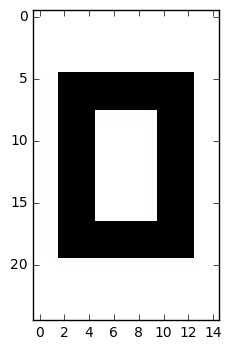

In [3]:
plt.gray()
plt.imshow(255 * M, interpolation='none')
None

We now consider the array `M` as being a real matrix, and compute its SVD, using the `svd` function from the module `linalg` 

In [4]:
U,s,V = linalg.svd(M, full_matrices=False)

The output of the `linalg.svd()` function consists of a vector $\mathbf{s}$ and two matrices $U$ and $V$. The vector $\mathbf{s}$ containing the singular values. The matrices $U$ and $V$ are such that:
$$
M=UDV
$$
where $D$ is a matrix with the singular values on its diagonal. (In the notation we used in class, $V$ is $P$ and $U$ is $Q^T$. The matrices $U$ and $V$ are orthogonal. 

We can check the correctness of the decomposition by reconstructing the matrix $M$ and redisplaying the image:

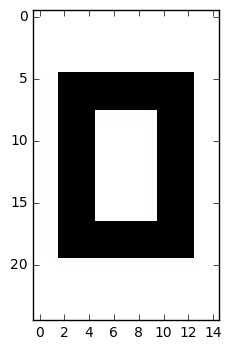

In [5]:
S = np.diag(s)
MR = np.dot(U, np.dot(S,V))
plt.gray()
plt.imshow(255 * MR, interpolation='none')
None

# Image Compression
So far, we didn't really accomplish much, since the amount of data needed to represent $U$, $\mathbf{s}$ and $V$ is about the same needed for the full image matrix $M$. However, let's examine the components of vector $\mathbf{s}$:

In [6]:
s

array([  1.47242531e+01,   5.21662293e+00,   3.31409370e+00,
         1.51448821e-16,   1.48952049e-16,   1.02144979e-32,
         2.71957431e-33,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00])

Notice that the values beyond the third are essentially zero. If the computations were done without roundoff errors, these would be exactly zero, because the rank of the matrix $M$ is 3. To see why this is the case, notice that there are only three different kinds of columns in the image:

- The white margins of the image, which are represented by an array of ones (remember, 1=white, 0=black).
- The columns corresponding to the left and right sides of the box.
- The columns corresponding to the top and bottom of the box.

As a consequence, we can represent the image by keeping only the first three singular values:

In [7]:
s1 = s[0:3]
s1

array([ 14.72425306,   5.21662293,   3.3140937 ])

To reconstruct the image, we need the first three columns of the matrix $U$ and the first three rows of matrix $V$:

In [8]:
U1 = U[:,0:3]
V1 = V[0:3,:]

Finally, here is the reconstruction:

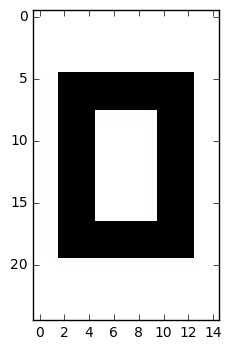

In [9]:
S1 = np.diag(s1)
M2 = np.dot(U1, np.dot(S1,V1))
plt.gray()
plt.imshow(255*M2, interpolation='none')
None

How much compression we achieved? The original matrix, $M$, has $25\times 15=375$ entries. If, instead of the matrix $M$, we transmit the matrices $U_1$, $V_1$ and the vector $s_1$, we have a total of $25\times 3+3\times15+3=123$ entries, so we get a compression factor of $123/375$, or about $33\%$. Notice that for a more realistic image the compression rate would probably not be so good.

# Noise Reduction
In the next application, let's assume that the image transmission is noisy. We can simulate this situation by adding a small random perturbation to the image data. This is done in the next cell, where we add a normally distributed random value to each entry of the matrix:

In [10]:
sd = 0.05
MN = M + sd * random.randn(25,15)

This is what the noisy image looks like:

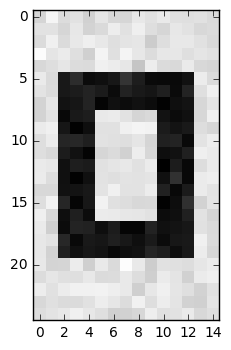

In [11]:
plt.gray()
plt.imshow(255 * MN, interpolation='none')
None

Let's see how we can "clean up" the noise by using a Singular Value Decomposition. First, we comopute the SVD:

In [12]:
U,s,V = linalg.svd(MN, full_matrices=False)

Let's now see what the singular values look like:

In [13]:
s

array([ 14.7578131 ,   5.22937477,   3.33441919,   0.383975  ,
         0.33826818,   0.31271074,   0.29881508,   0.2648192 ,
         0.25440087,   0.19885545,   0.18167082,   0.16583319,
         0.15139172,   0.12084663,   0.10242299])

Notice that there is a somewhat sharp drop in the size of the singular values after the third one. Let's see what happens if we keep only the first three singular values:

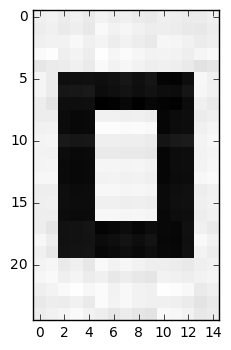

In [14]:
nc = 3
s1 = s[0:nc]
U1 = U[:,0:nc]
V1 = V[0:nc,:]
S1 = np.diag(s1)
M2 = np.dot(U1, np.dot(S1,V1))
plt.gray()
plt.imshow(255*M2, interpolation='none')
None

Notice that the noise in the image was significantly decreased. In a real application, we would have to decide how many components should be kept